In [18]:
import math
import numpy as np
from random import randint
import matplotlib.pyplot as plt

In [19]:
# low = lower range for variables, high = higher range for variables
def genesis(size,var, high , low):
   pop_size = (size,var)
   new_pop = np.random.uniform(low=low,high=high,size=pop_size)
   return new_pop

In [20]:
def fitness(p):
# Evaluating fitness Interference function "double fit (doublep[])".
   fitness=np.zeros((len(p),1))
   for i in range(len(p)):
       x,y,z = p[i][0] , p[i][1] , p[i][2]
        # Define your fitness function here
       fitness[i,0] = 2 * x * z * math.exp(-x) - 2 * y**3 + y**2 - 3 * z**3
   return fitness

In [21]:
def selection(pop, fitness, num_parents):
   parents = np.empty((num_parents, pop.shape[1]))
   for parent_num in range(num_parents):
      max_fitness_idx = np.where(fitness == np.max(fitness))
      max_fitness_idx = max_fitness_idx[0][0]
      parents[parent_num, :] = pop[max_fitness_idx, :]
      fitness[max_fitness_idx] = -99999999999
   return parents

In [22]:
def crossover(parents, offspring_size):
   offspring = np.empty(offspring_size)
   crossover_point = np.uint8(offspring_size[1]/2)
   for k in range(offspring_size[0]):
      parent1_idx = k%parents.shape[0]
      parent2_idx = (k+1)%parents.shape[0]
      offspring[k, 0:crossover_point] = parents[parent1_idx,     0:crossover_point]
      offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
   return offspring

In [23]:
def mutation(offspring_crossover):
   for idx in range(offspring_crossover.shape[0]):
      random_value = np.random.uniform(-10, 10, 1)
# 10 percent change maximum keeping 90 percent mutation rate 
      i= randint(0, 2)
      offspring_crossover[idx, i] = offspring_crossover[idx, i] + random_value 
   return offspring_crossover

In [24]:


num_var = 3
sizeof_pop= 100
upper_limit = 100
lower_limit = -100
num_parents = 2

population = genesis(sizeof_pop , num_var, upper_limit ,lower_limit)
print(population)
Scores=[]
num_generations = 20
for generation in range(num_generations):
   print("\n\nGeneration : ", generation)
   fitness_score = fitness(population)
   parents = selection(population, fitness_score, num_parents)
   print("Best Parents \n",parents)
   offspring_crossover = crossover(parents, offspring_size=(2*num_parents, num_var))
   offspring_mutation = mutation(offspring_crossover)
   print("Mutated OffSprings\n",offspring_mutation)
   population[0:parents.shape[0], :] = parents
   population[parents.shape[0]:6, :] = offspring_mutation
   Scores.append(np.max(fitness_score))
   print("Best result : ", np.max(fitness_score))

[[ 9.56371051e+01 -3.35790744e+01  8.73905210e+00]
 [-4.49029475e+01 -7.28473588e+01 -6.66277600e+01]
 [ 6.28893338e+01  7.42023937e+01  5.15842330e+01]
 [-9.48589450e+01  7.15674108e+01  1.04603545e+01]
 [ 6.87588699e+01  2.60032768e+01  8.93488791e+01]
 [-6.31640298e+01  9.72571605e+00 -8.43154975e+01]
 [-2.69948639e+01  1.65067048e+01 -1.68073988e+01]
 [ 3.41755910e+01  6.28302875e+01  3.34481780e+01]
 [-3.01321644e+01 -8.35277480e+01 -3.36113552e+01]
 [ 8.23581392e+01 -8.22247229e+01  2.65537863e+01]
 [-2.73178513e+01 -4.91321061e+00  9.20407983e+01]
 [-2.55763420e+01 -2.32839411e+01  9.29533293e+01]
 [-7.83186762e+01 -7.28015729e+01  7.54625829e+01]
 [-2.83433025e+01 -7.79723455e+01  2.42553779e+01]
 [-4.32053705e+00 -3.35752548e+01 -1.20593609e+01]
 [ 4.88430574e+01 -8.87382818e+00  8.13646893e+01]
 [-2.29696156e+01 -3.13421672e+01 -8.19555271e+01]
 [-2.78131513e+01  4.46891600e+01  8.21884784e+01]
 [-9.53491843e+01  1.30430541e+01  9.53357312e-03]
 [ 1.55923068e+01 -9.69108653e+

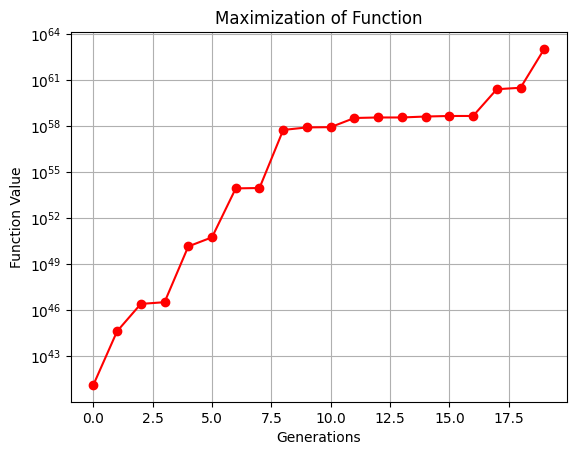

In [25]:

Evaluations = Scores
plt.plot(Evaluations,'o-',color='red')
plt.yscale('log')
plt.xlabel('Generations')
plt.ylabel('Function Value')
plt.title("Maximization of Function")
plt.grid(True)
plt.show()